# Problem statement
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
#Importing EDA and Visualization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Regression Libraries
import statsmodels.formula.api as smf

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting up Figure Parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [3]:
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.drop(columns = {'State'}, inplace = True)

In [5]:
#Changing column names to remove spaces
df.rename(columns={'R&D Spend' : 'RD_Spend'}, inplace=True)
df.rename(columns={'Marketing Spend' : 'Marketing_Spend'}, inplace=True)

Looking at the dataset and the Problem Statement.

We got multiple columns, therefore we have to built Multile Linear Regression Model over this dataset for the prediction of Profit(Given in Problem Statement).

In [6]:
df.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.shape

(50, 4)

In [8]:
df.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

<AxesSubplot:>

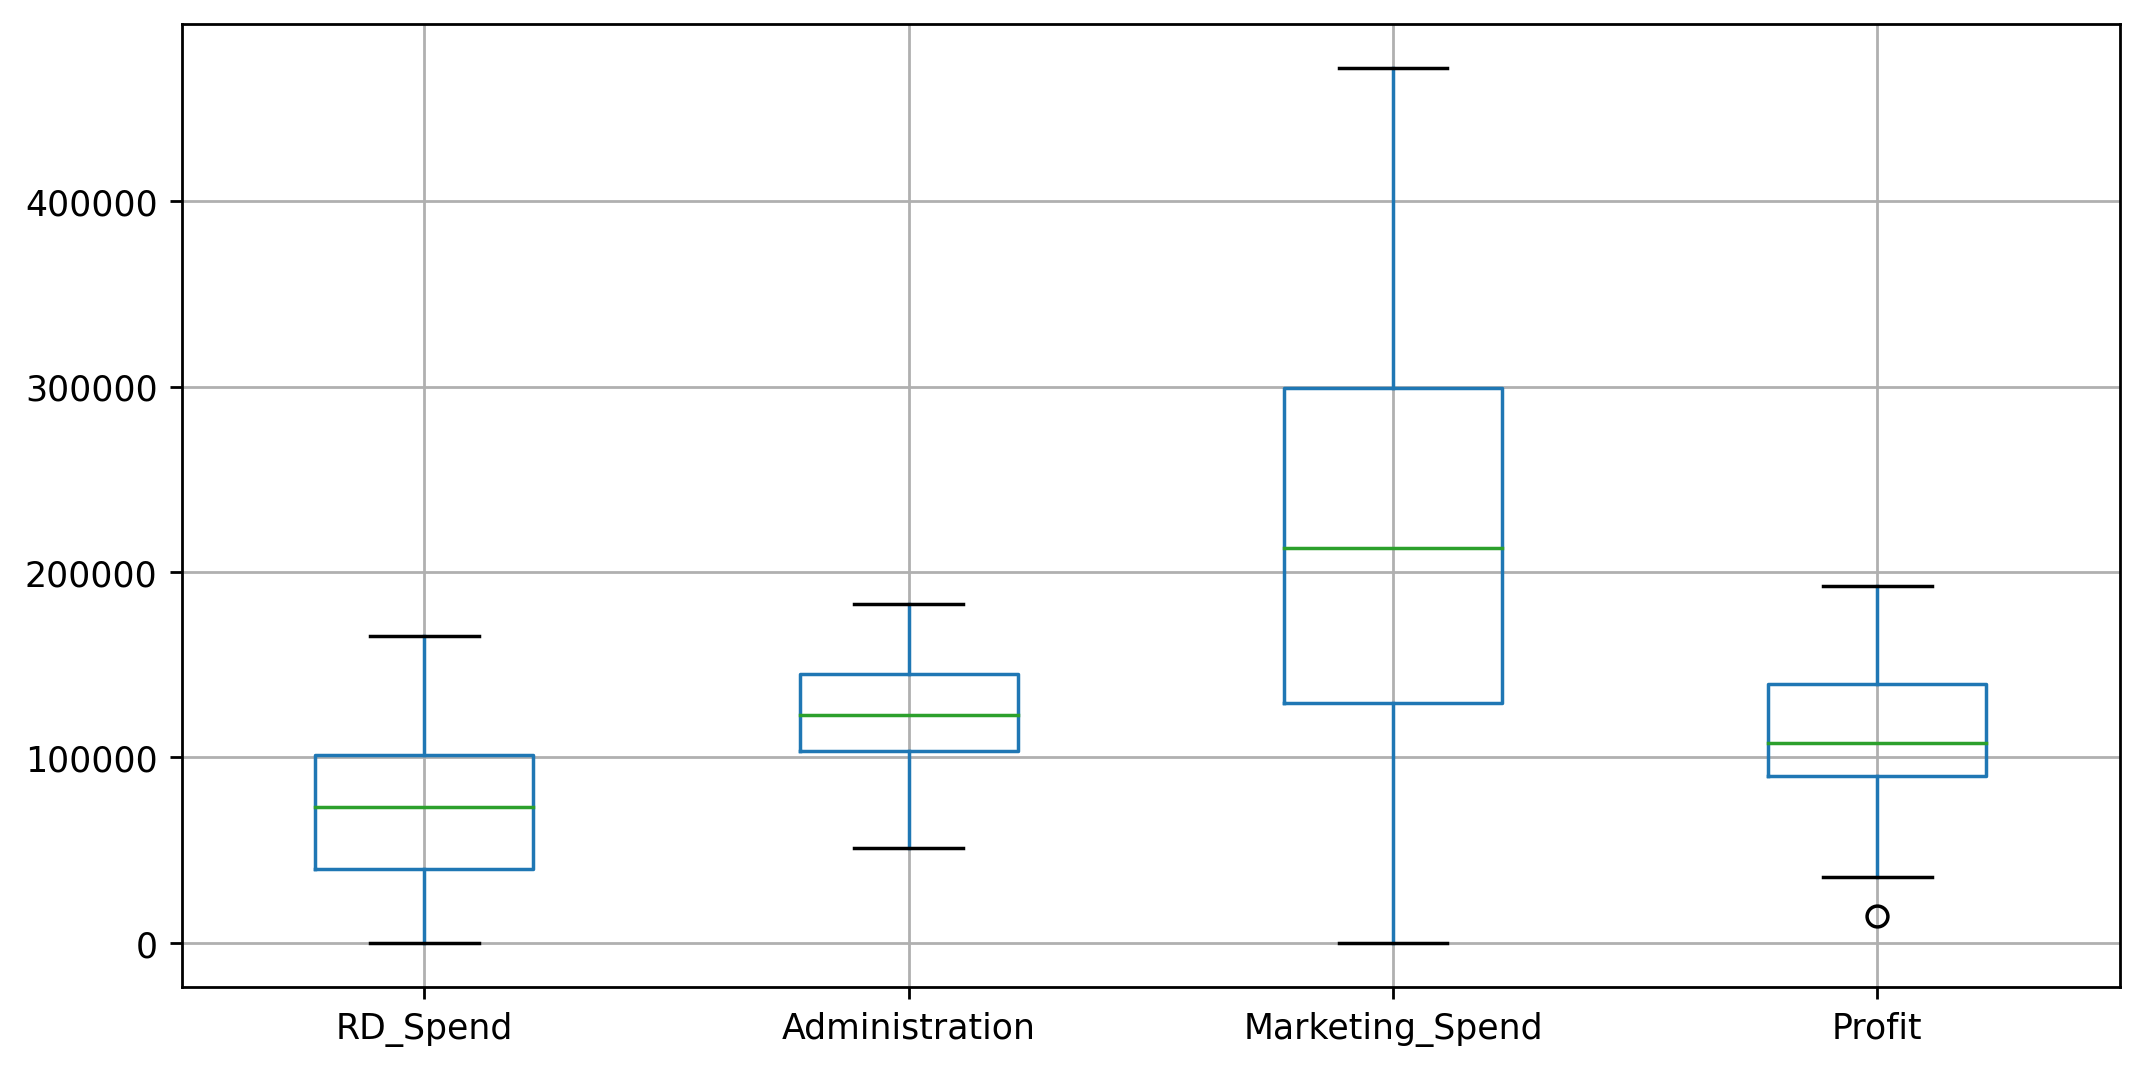

In [9]:
df.boxplot()

In [10]:
df.skew()

RD_Spend           0.164002
Administration    -0.489025
Marketing_Spend   -0.046472
Profit             0.023291
dtype: float64

<AxesSubplot:xlabel='Administration', ylabel='Density'>

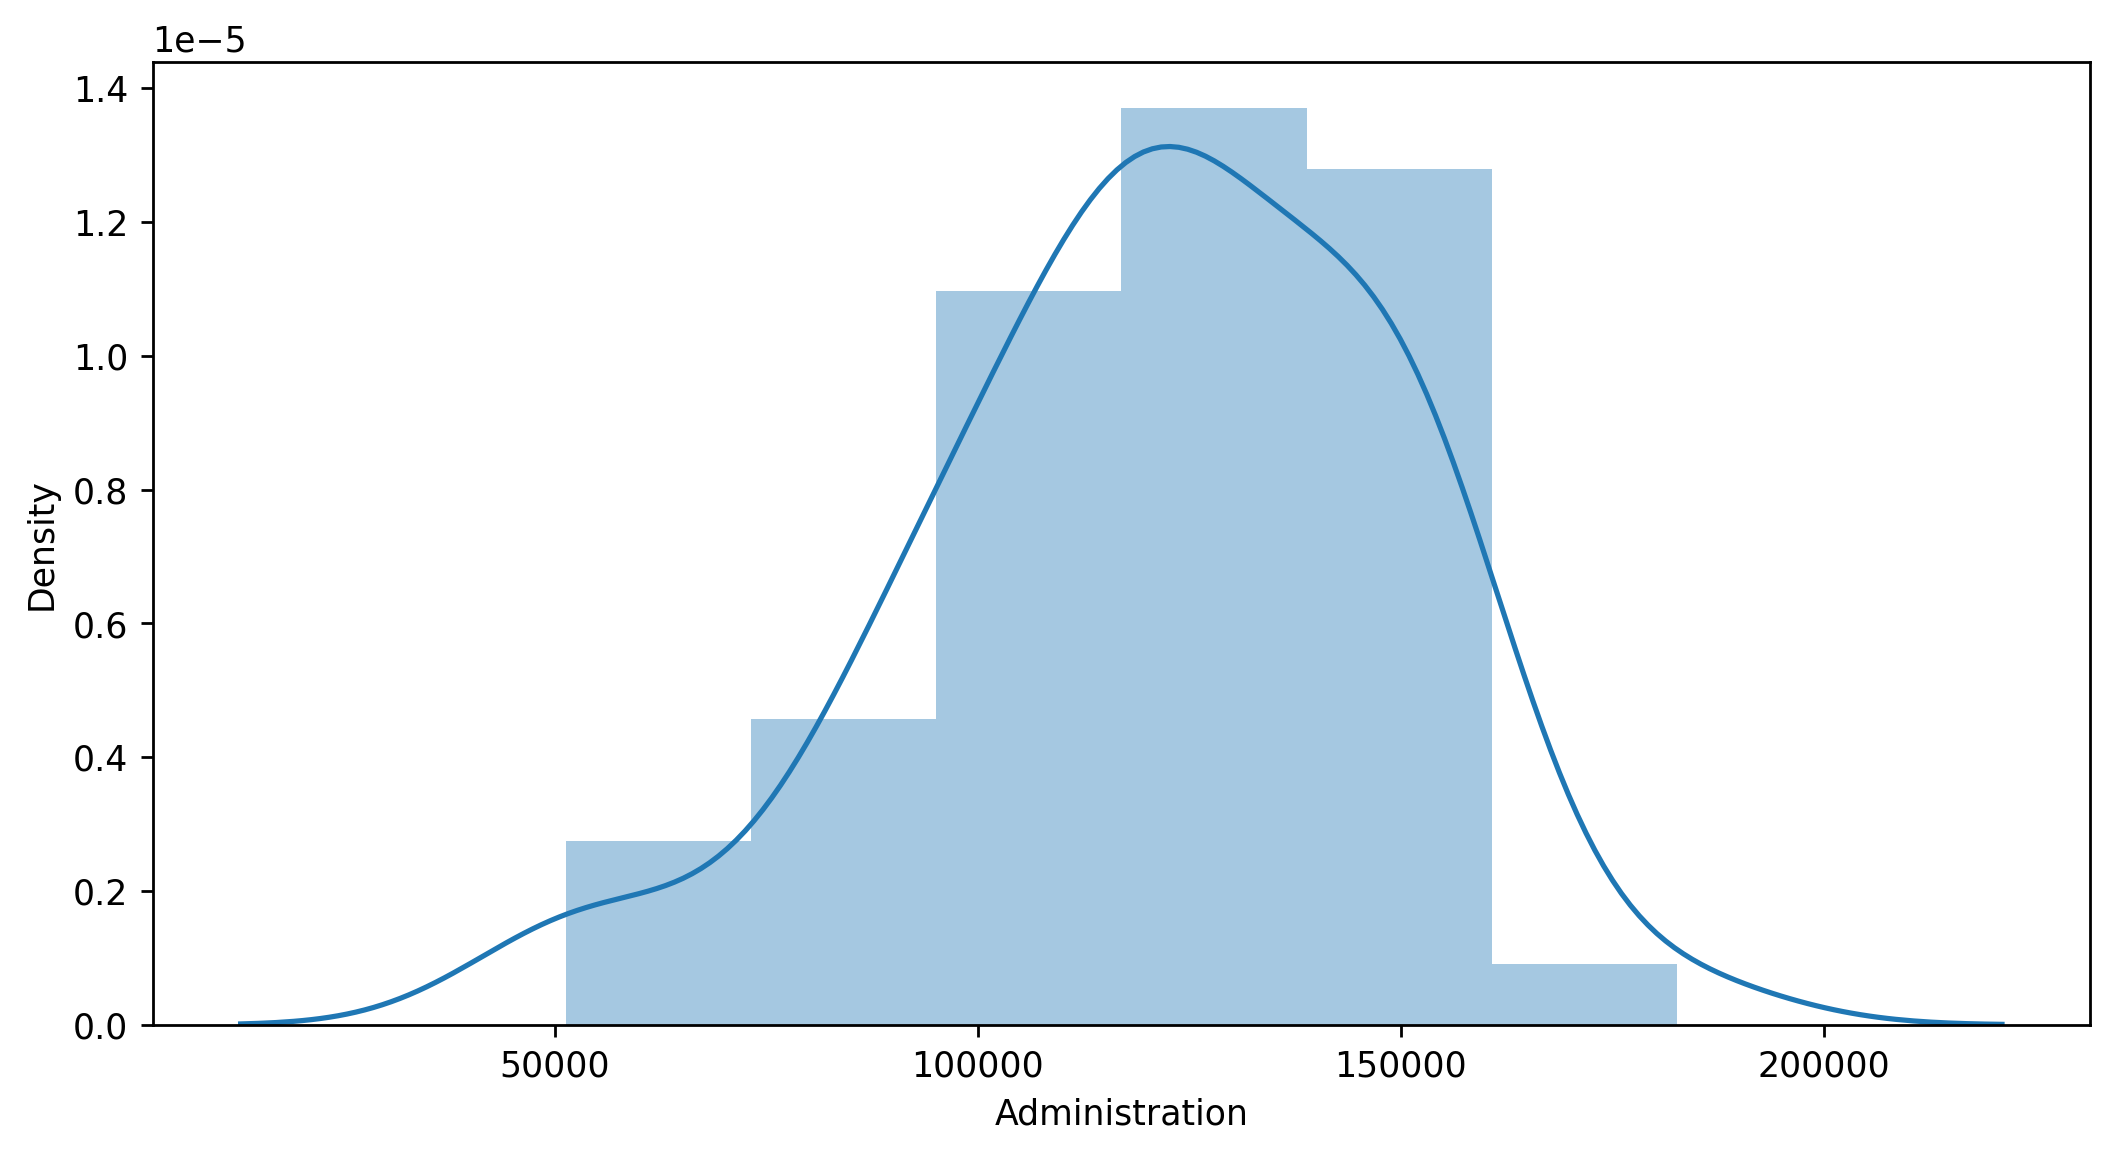

In [11]:
#Administration column shows little left skewness therefore we check by plotting a distplot for the column
sns.distplot(df['Administration'])

Distplot doesn't show much skewness therfore we move forward

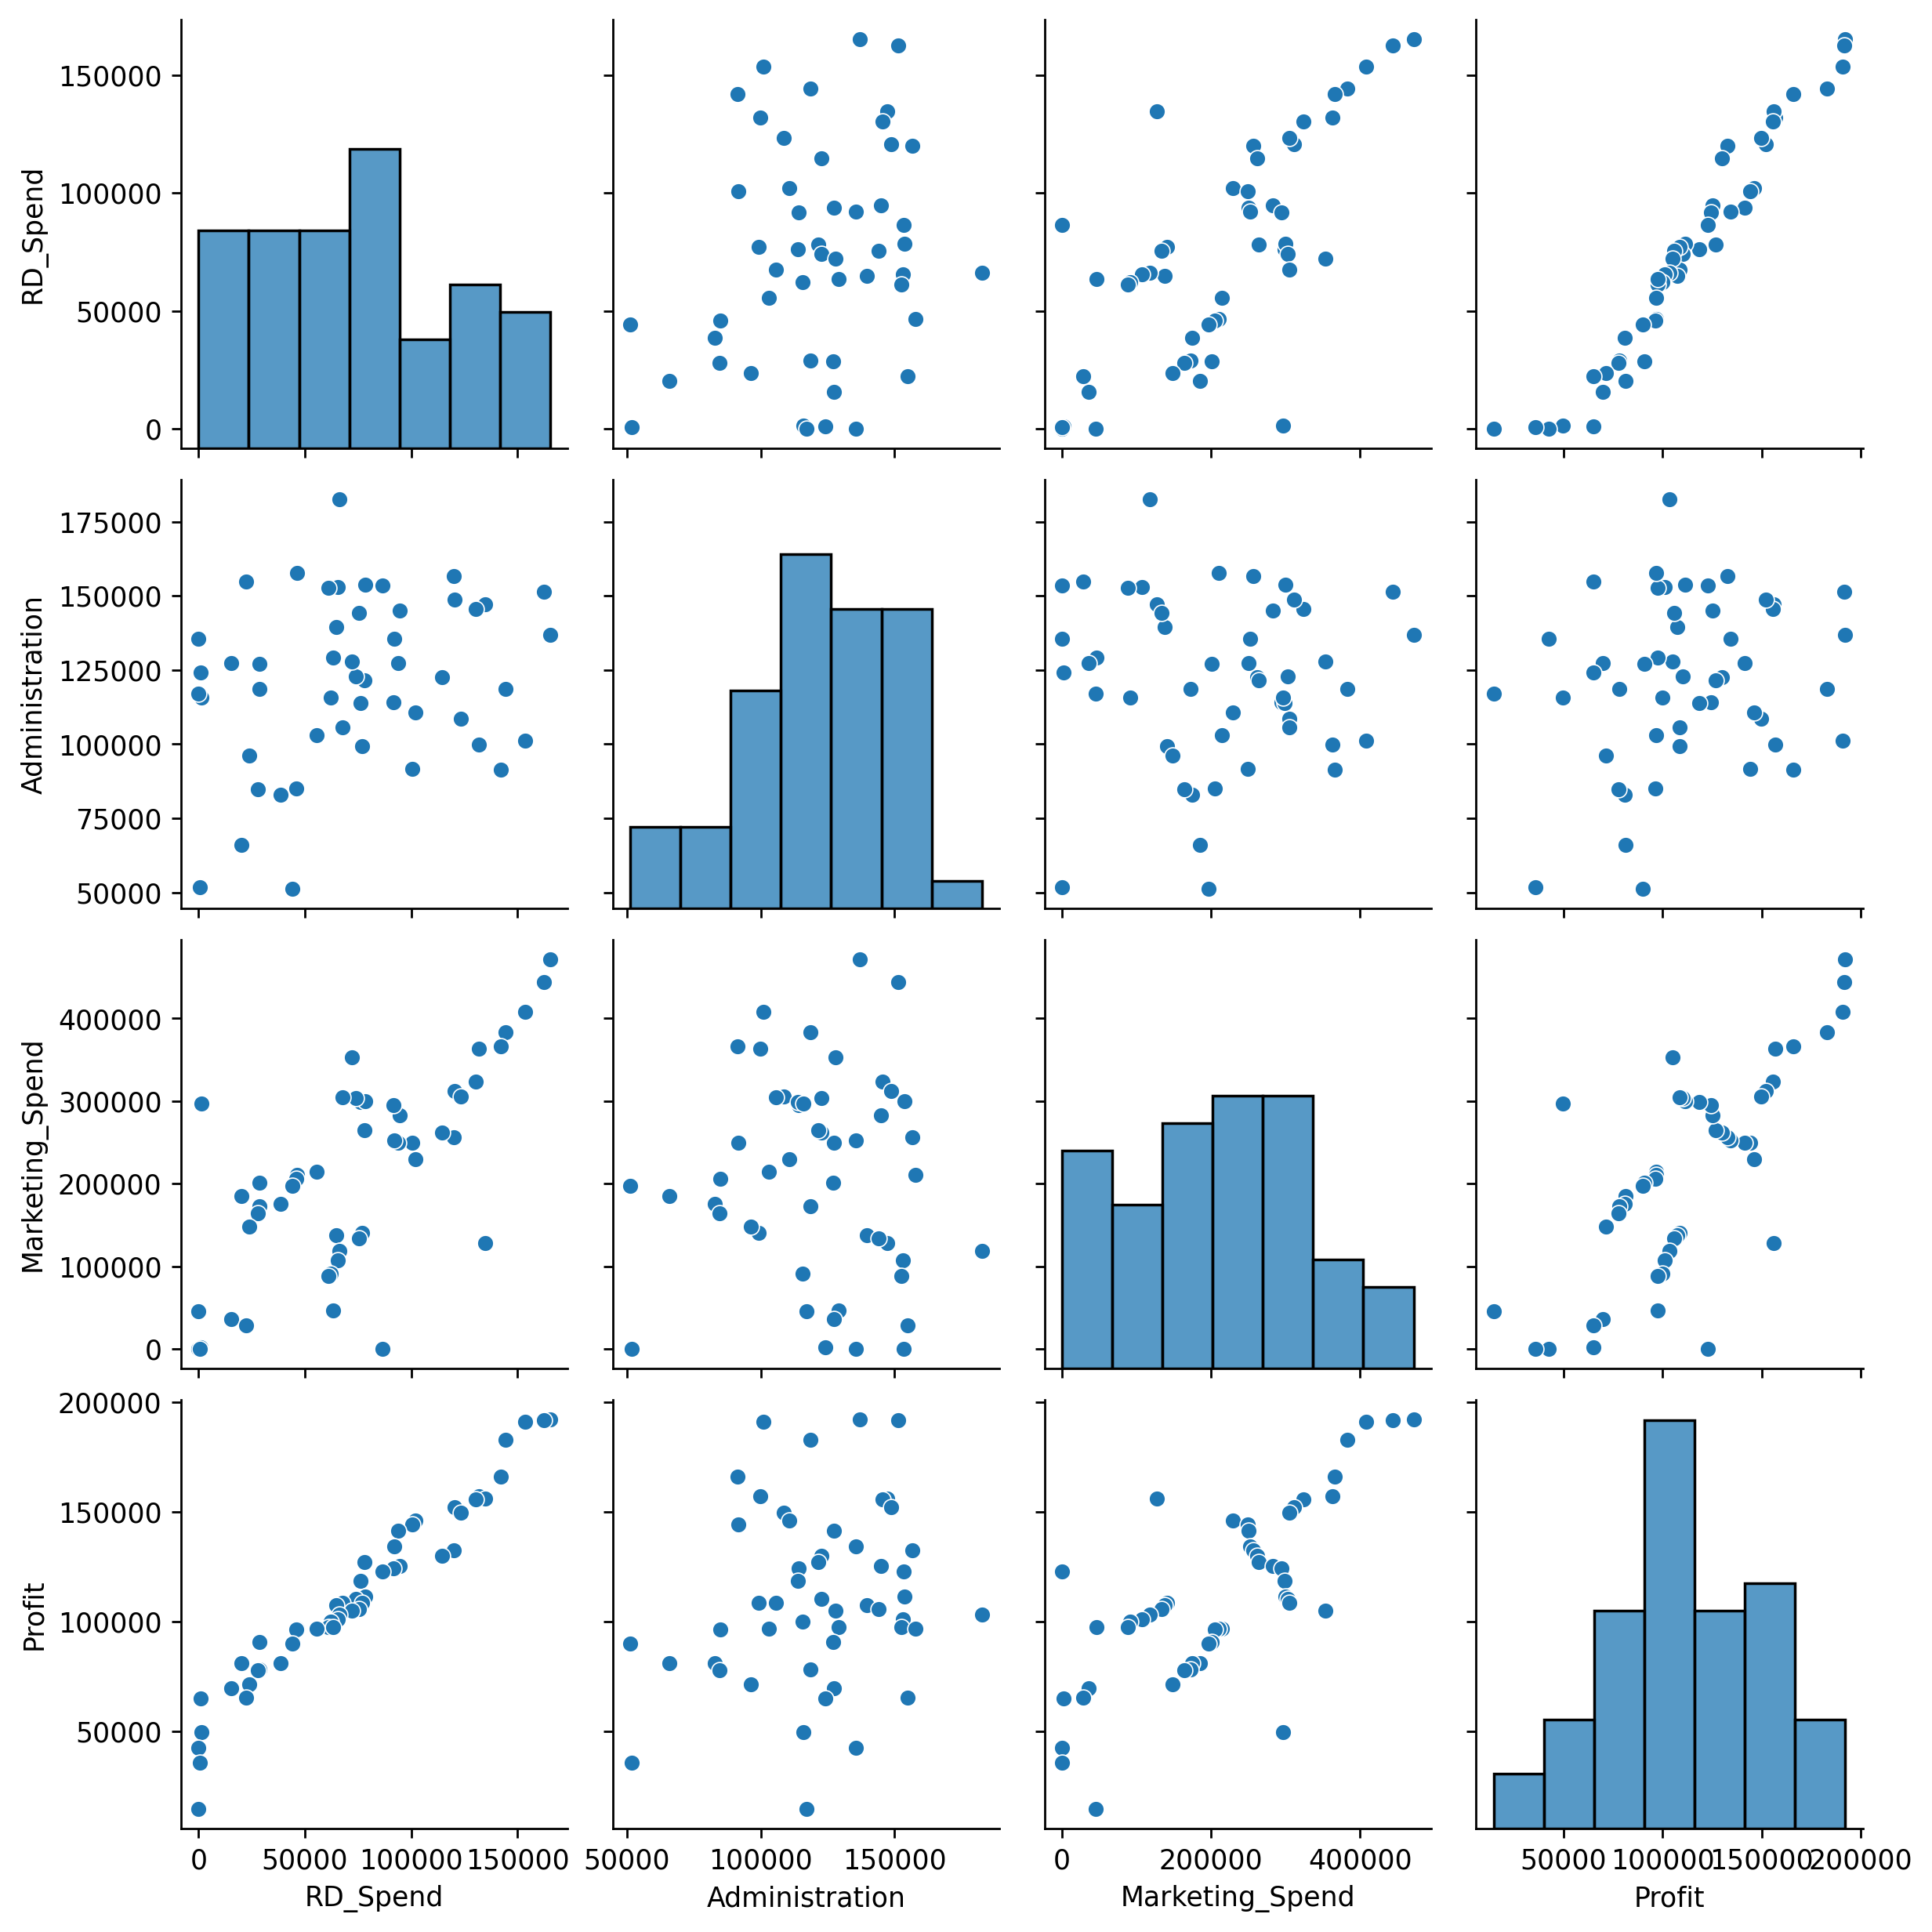

In [12]:
#Profit shows outlier therefore we plot piarplot to check it against wole dataset and confirm
sns.pairplot(df)

<AxesSubplot:>

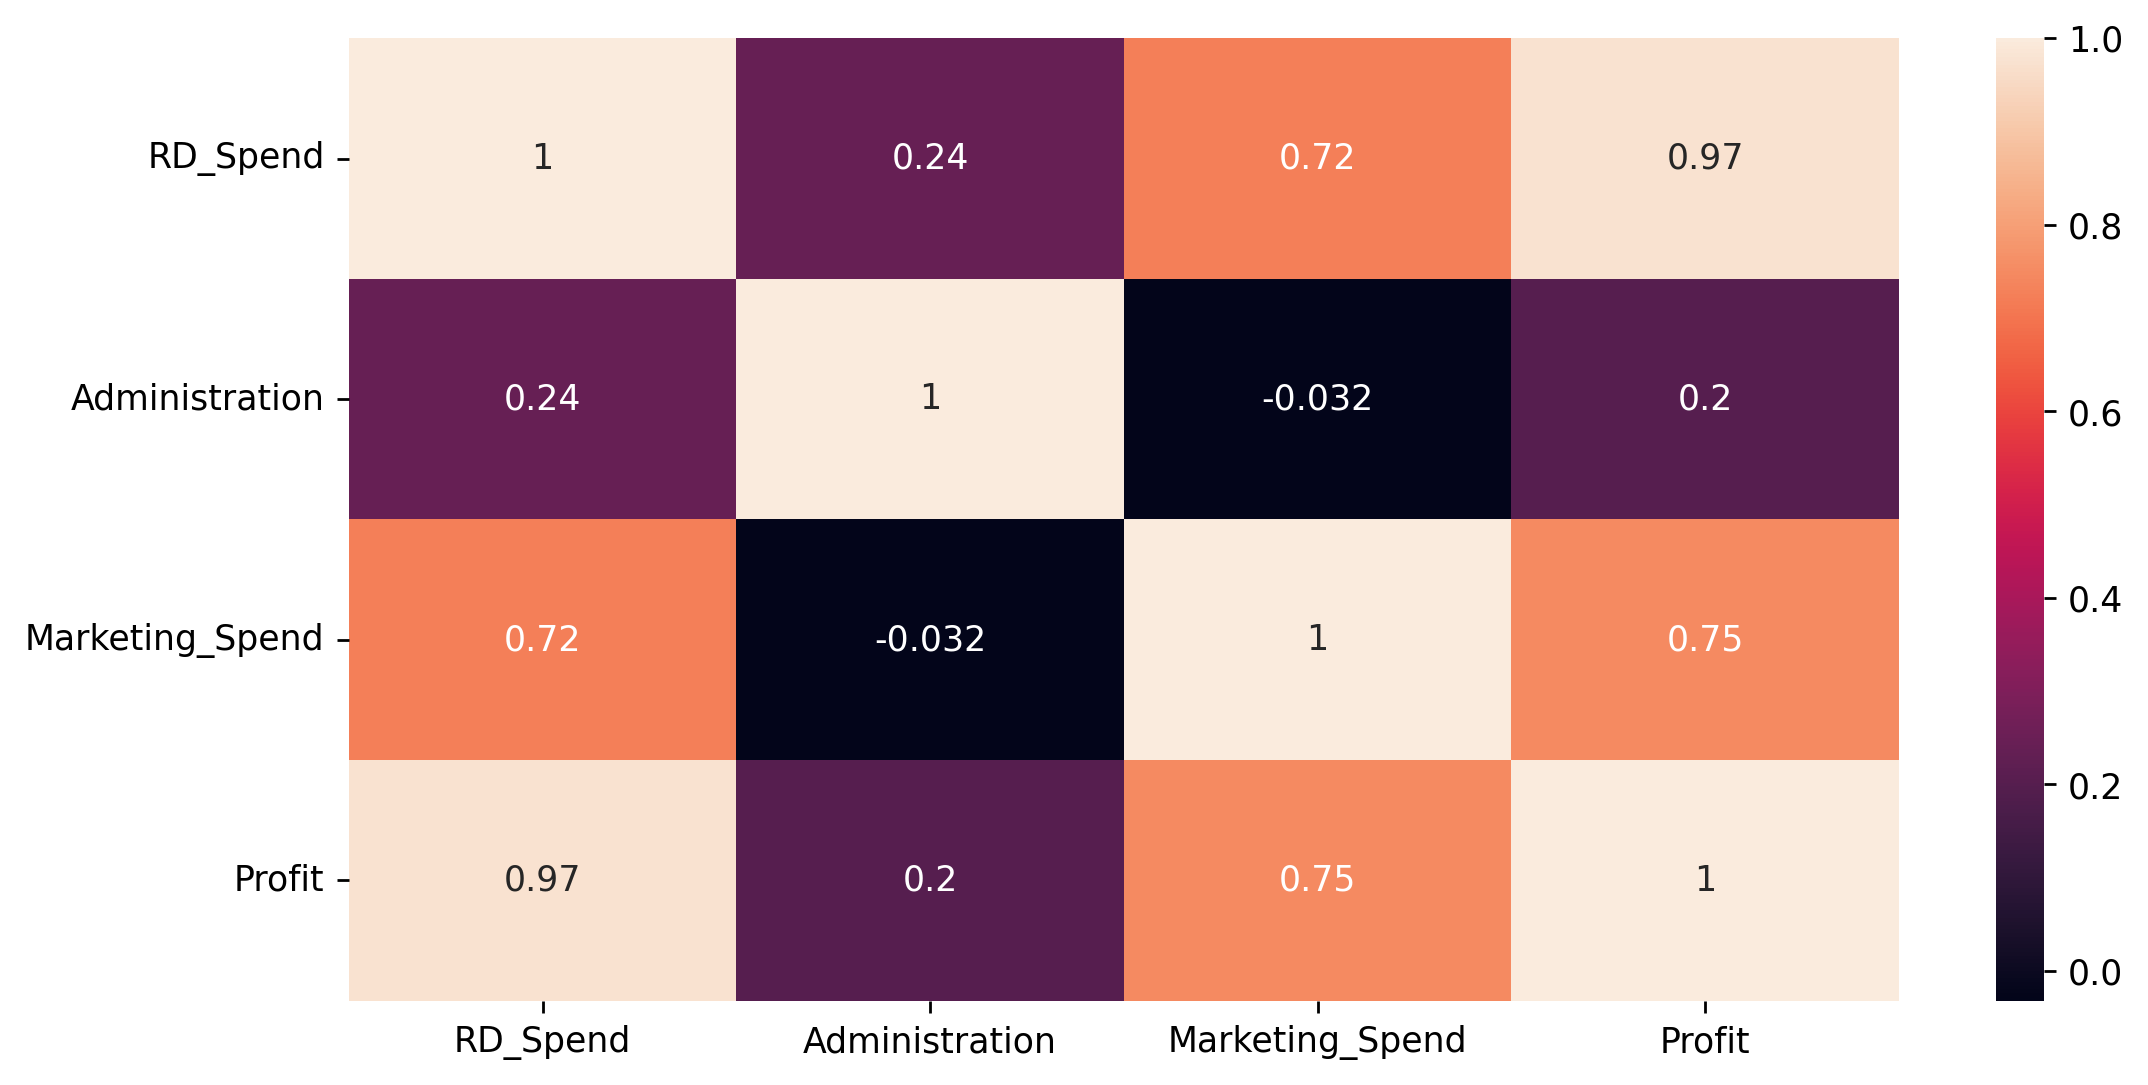

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend', data=df).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        14:18:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.rsquared

0.9507459940683246

In [17]:
admin = smf.ols('Profit~Administration', data=df).fit()

In [18]:
admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 09 Apr 2023   Prob (F-statistic):              0.162
Time:                        14:18:07   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking for VIF values

In [19]:
df.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

In [20]:
r_Admin = smf.ols('Administration~Marketing_Spend+RD_Spend', data=df).fit().rsquared
vif_Admin = 1/(1-r_Admin)

r_Marketing = smf.ols('Marketing_Spend~Administration+RD_Spend', data=df).fit().rsquared
vif_Marketing = 1/(1-r_Marketing)


r_RD = smf.ols('RD_Spend~Administration+Marketing_Spend', data=df).fit().rsquared
vif_RD = 1/(1-r_RD)

In [21]:
vif = pd.DataFrame({
    'Features' : ['Administration', 'Marketing', 'RD_Spend'],
    'VIF_Score' : [vif_Admin,vif_Marketing,vif_RD]
})

In [22]:
vif

,Features,VIF_Score
0,Administration,1.175091
1,Marketing,2.326773
2,RD_Spend,2.468903


So, All the columns seems to be okay with collinearity.

Therefore, We can move forward with further process.

Doing residual analysis

In [23]:
import statsmodels.api as sm

In [24]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

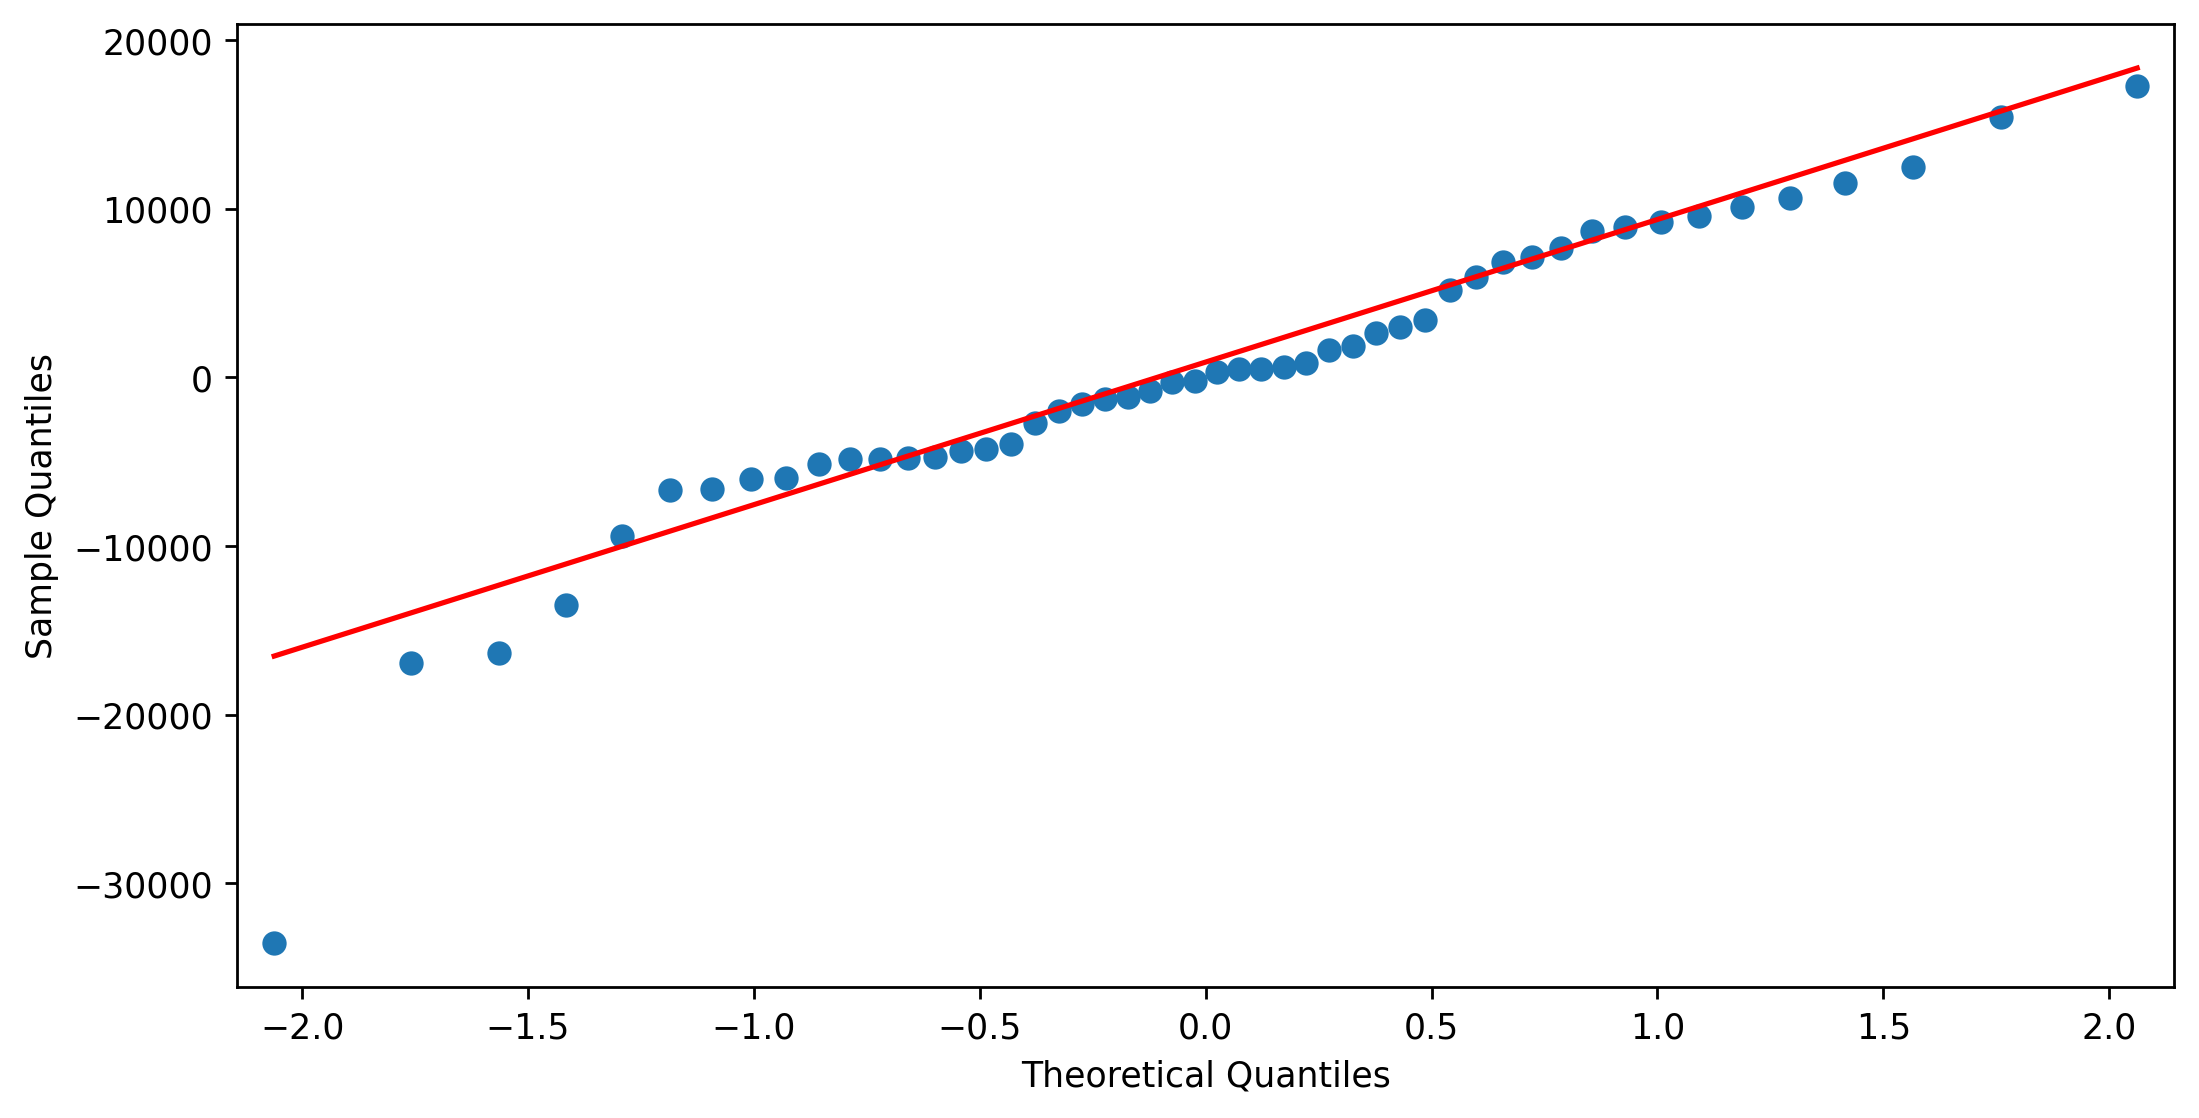

In [25]:
#QQ_PLOT
sm.qqplot(model.resid, line='q');

In [26]:
np.where(model.resid < -30000)

(array([49], dtype=int64),)

Text(0, 0.5, 'Fitted Values')

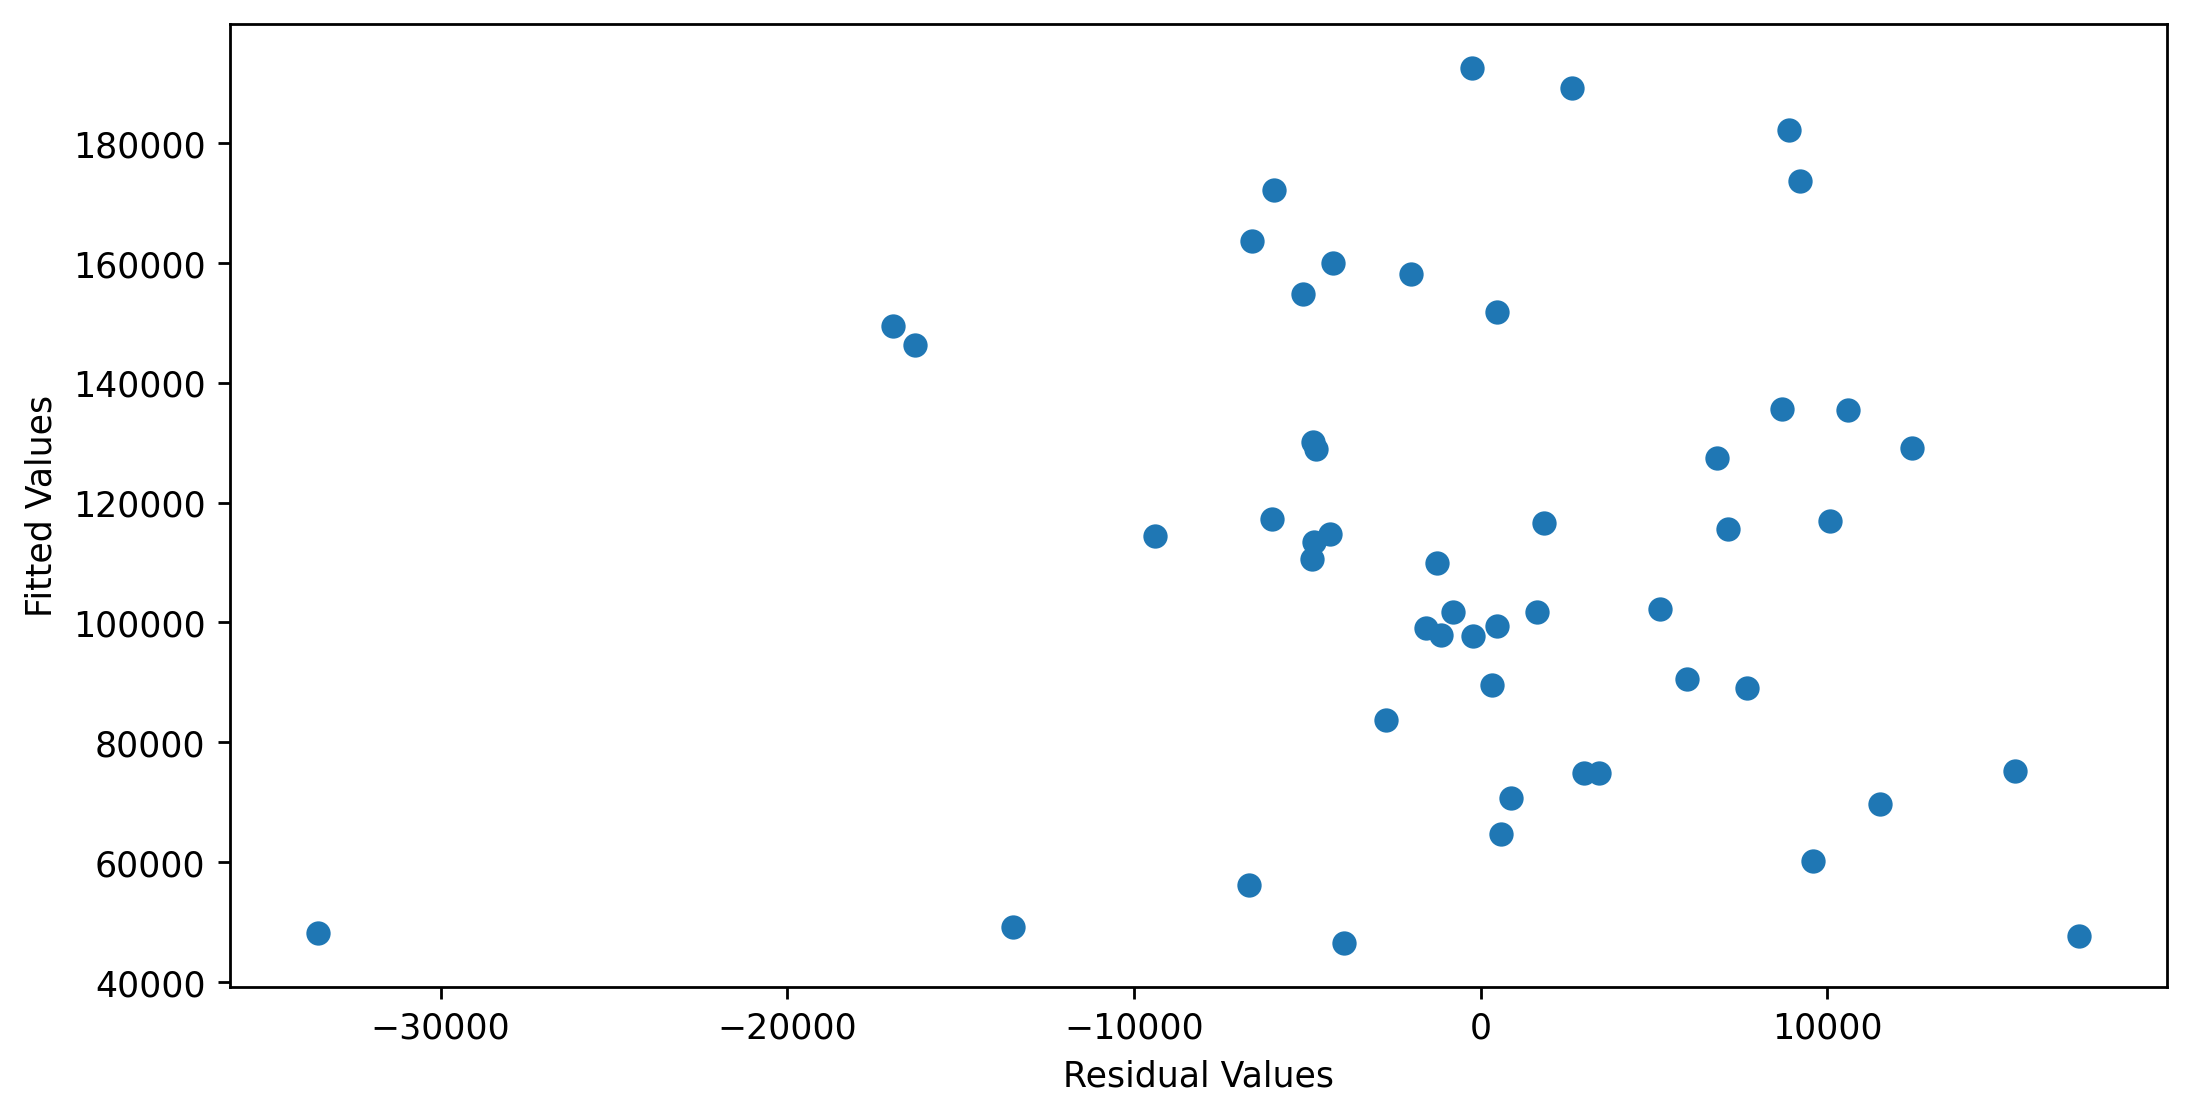

In [27]:
#ScatterPlot for residual vs fitted values
plt.scatter(model.resid, model.fittedvalues)
plt.xlabel('Residual Values')
plt.ylabel('Fitted Values')

There is a pattern found in the plot, something is wrong with the model.

we plot residual vs regressor plot

eval_env: 1


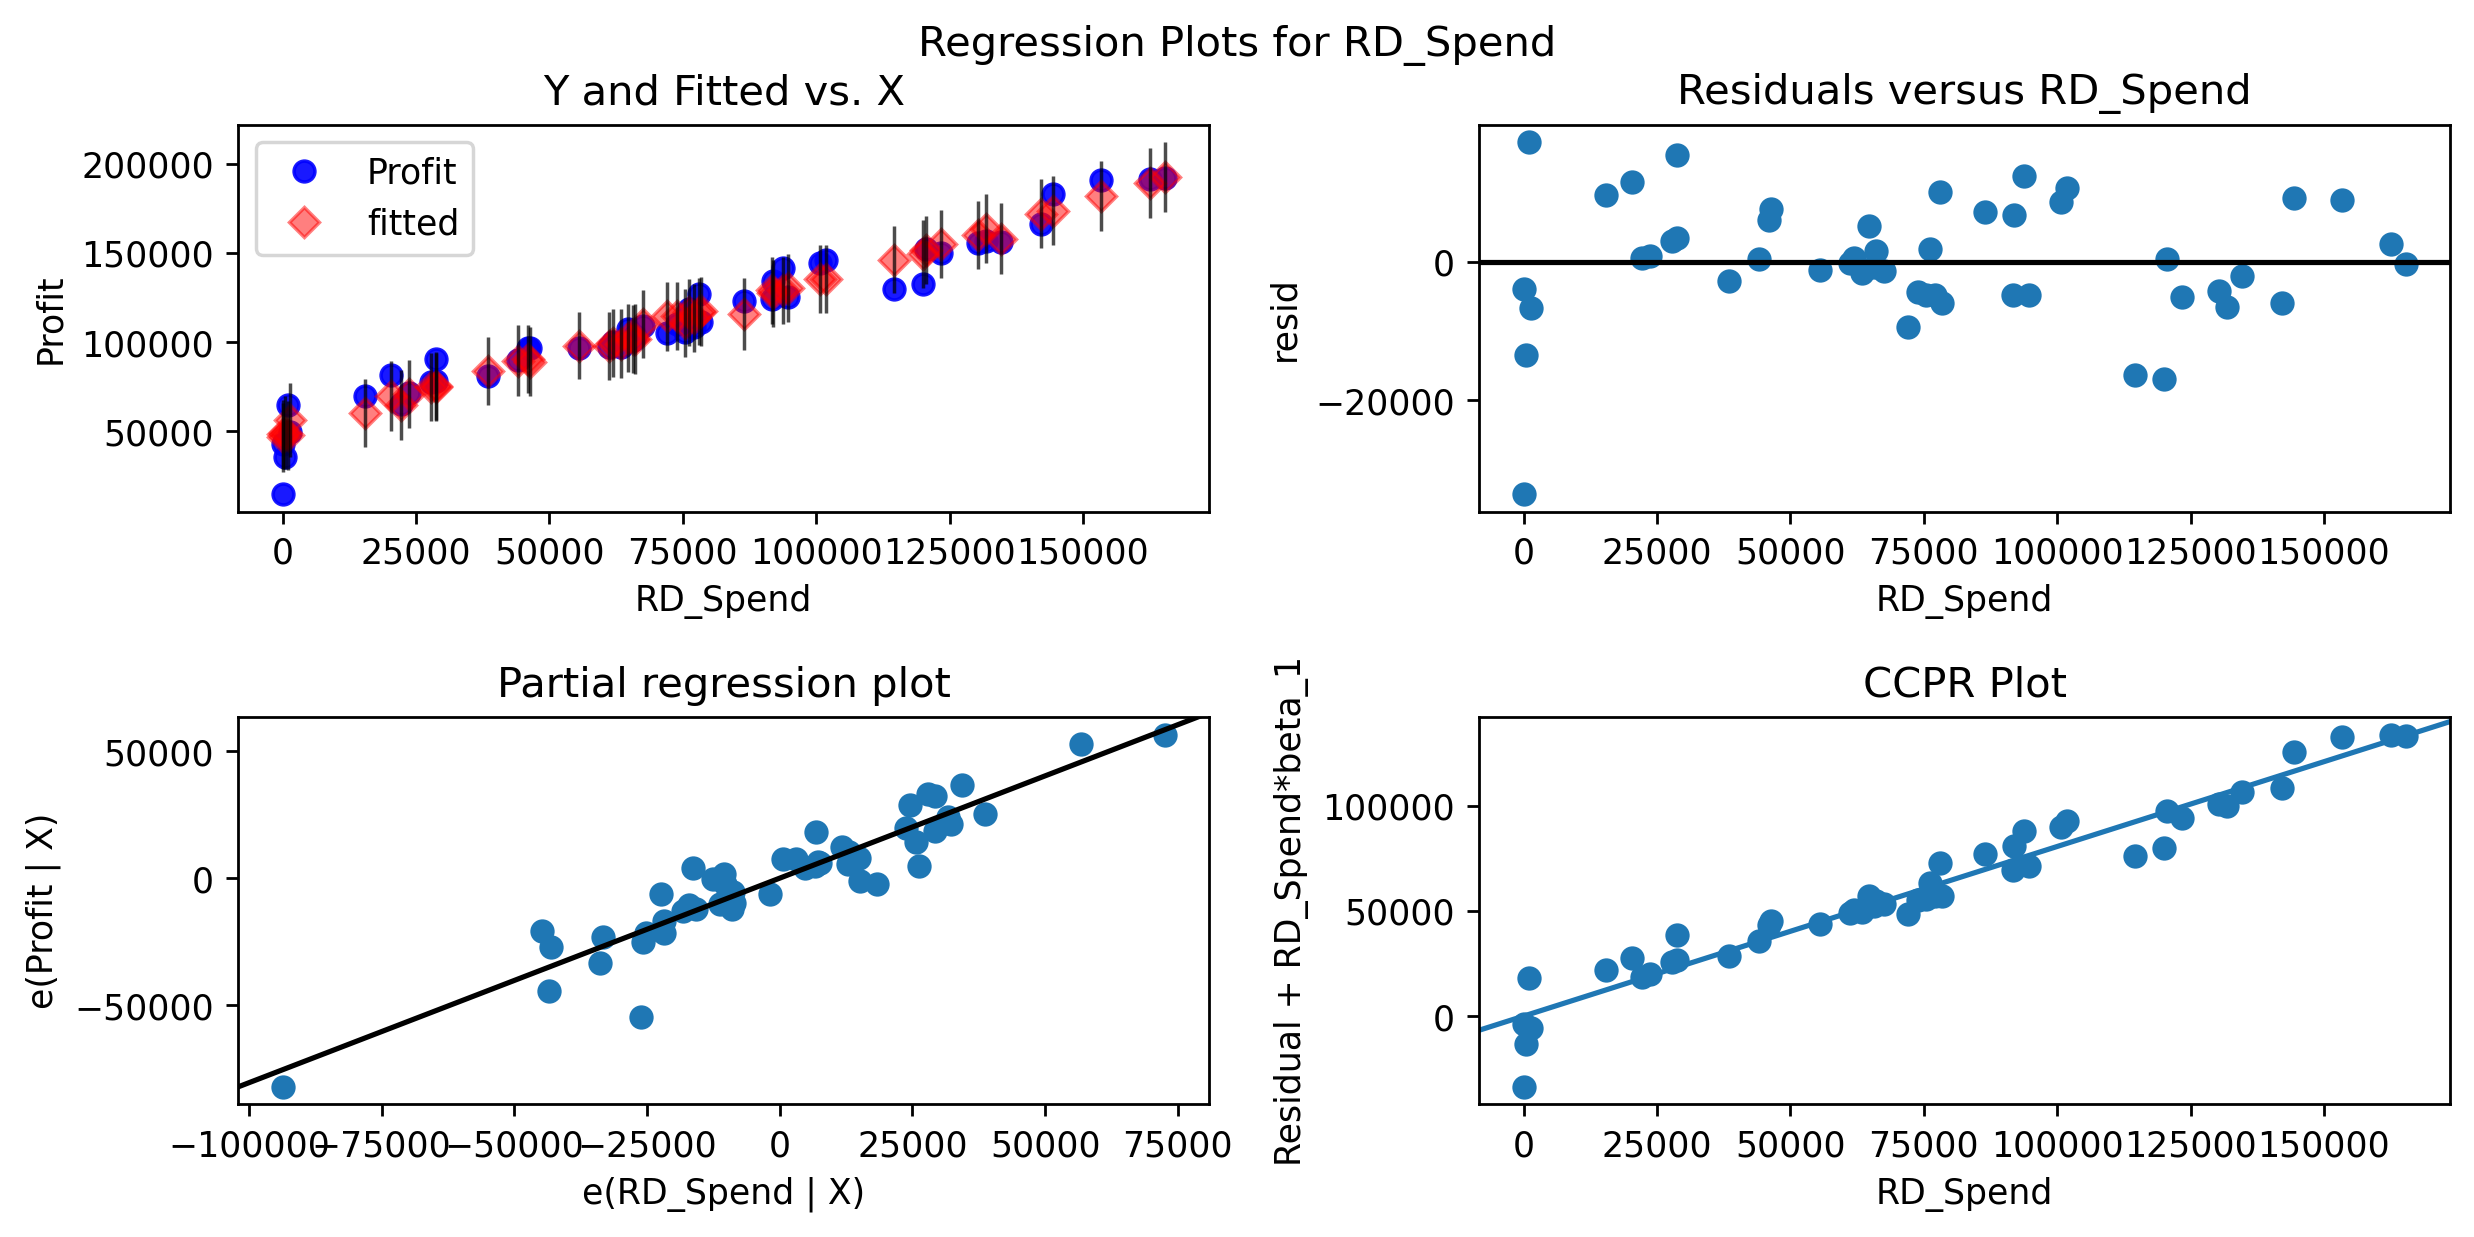

In [28]:
sm.graphics.plot_regress_exog(model, 'RD_Spend');

eval_env: 1


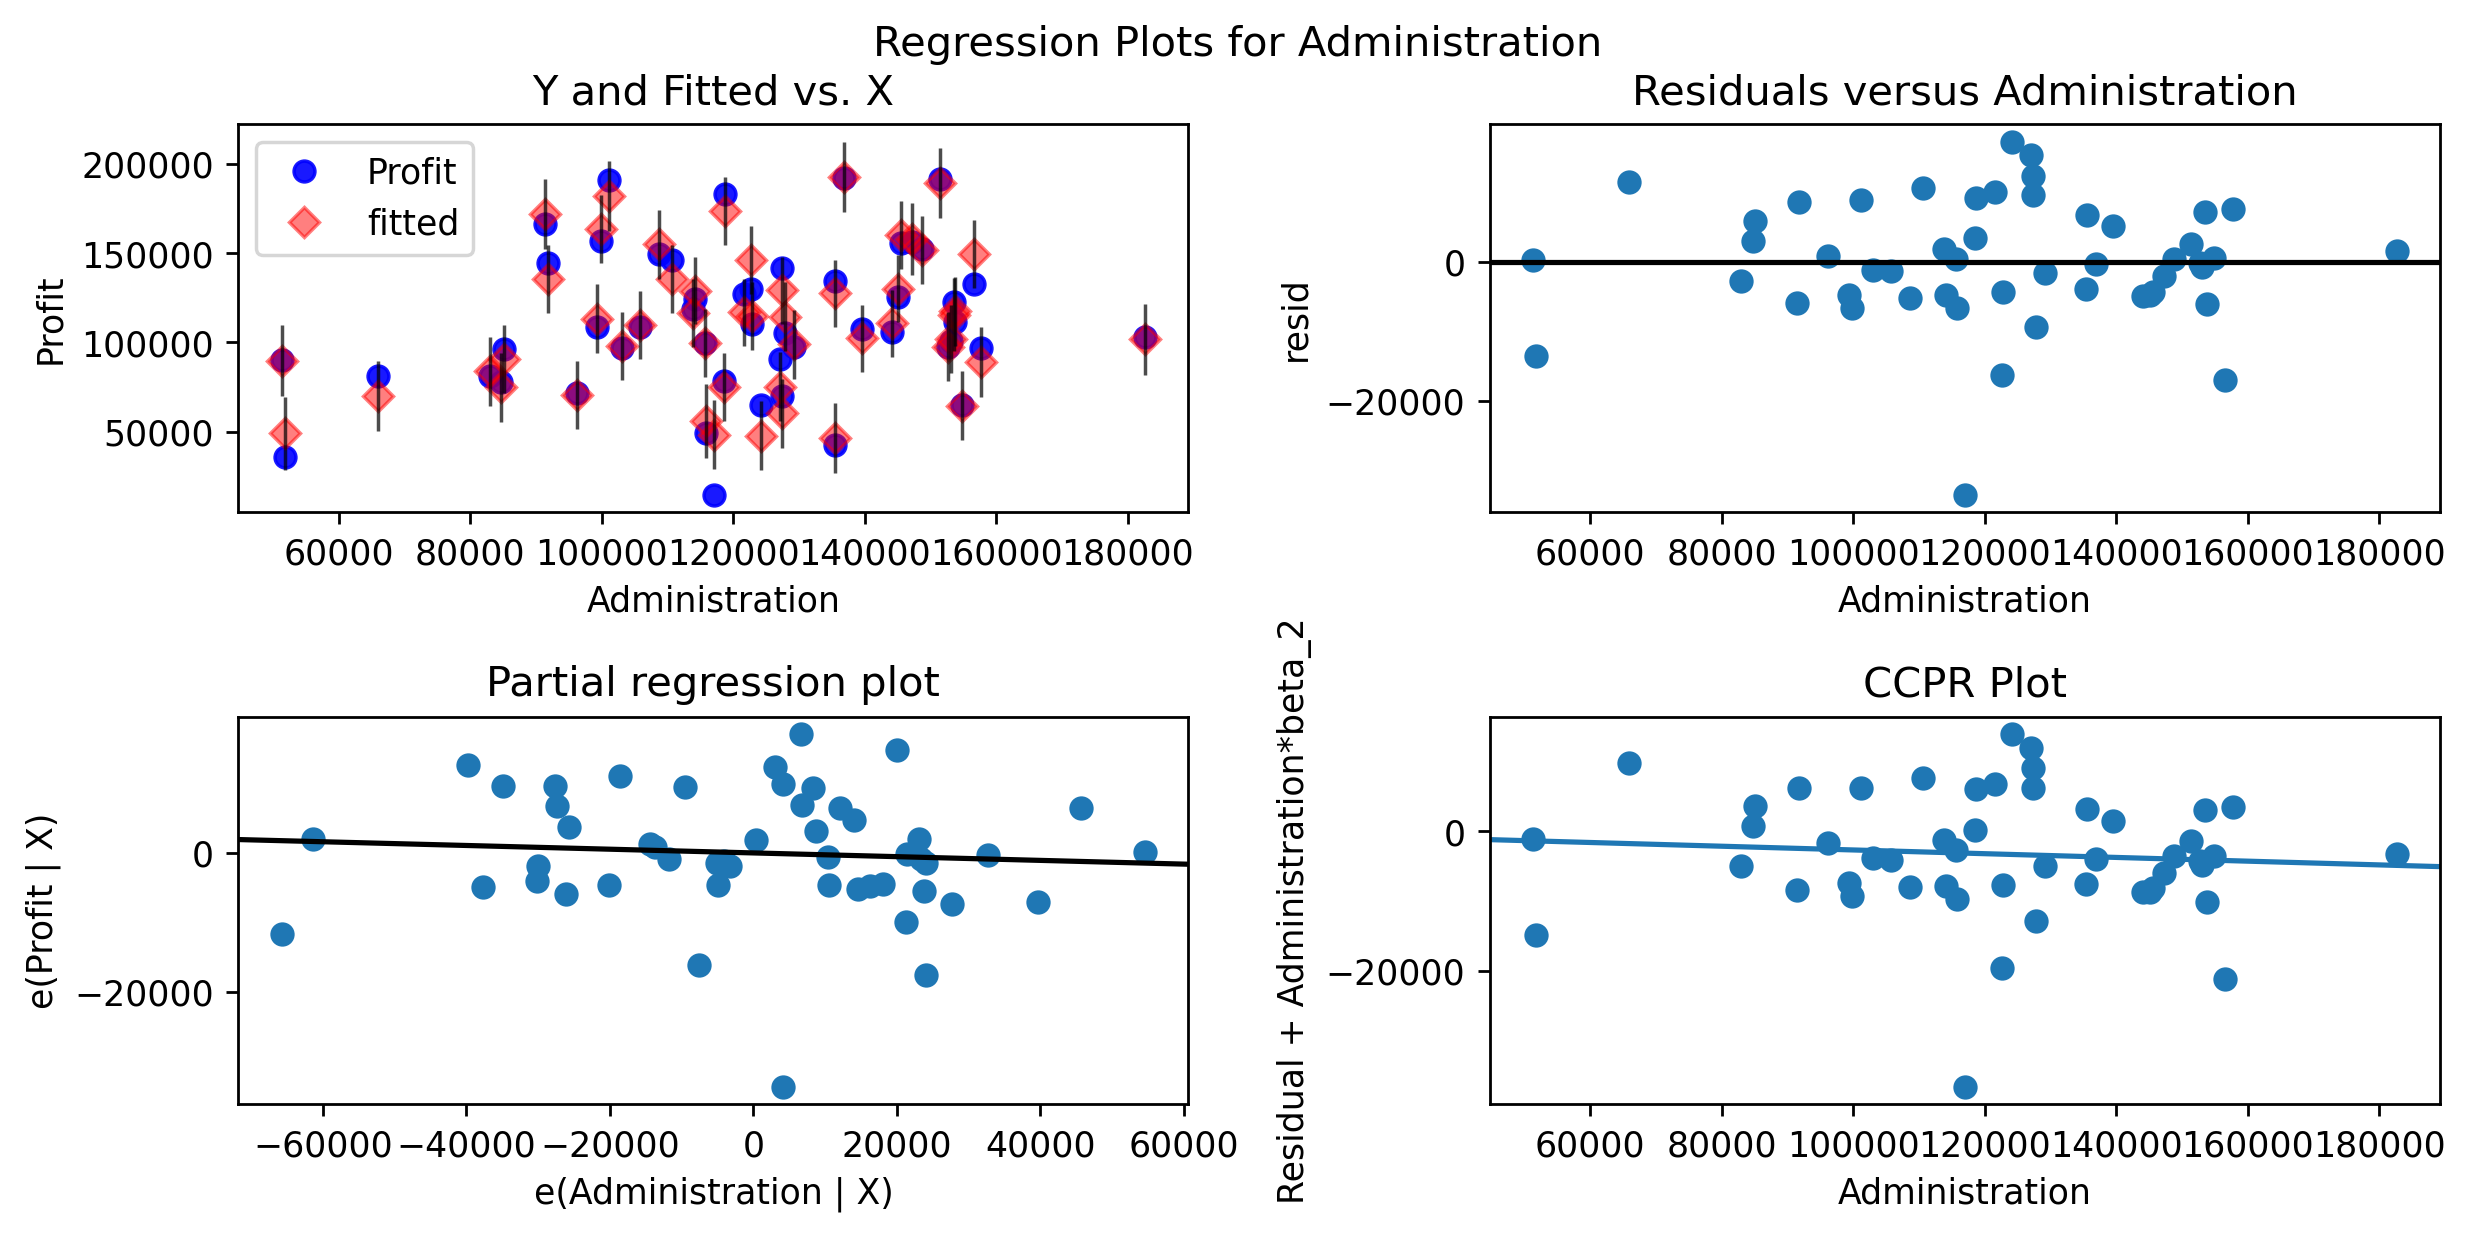

In [29]:
sm.graphics.plot_regress_exog(model, 'Administration');

eval_env: 1


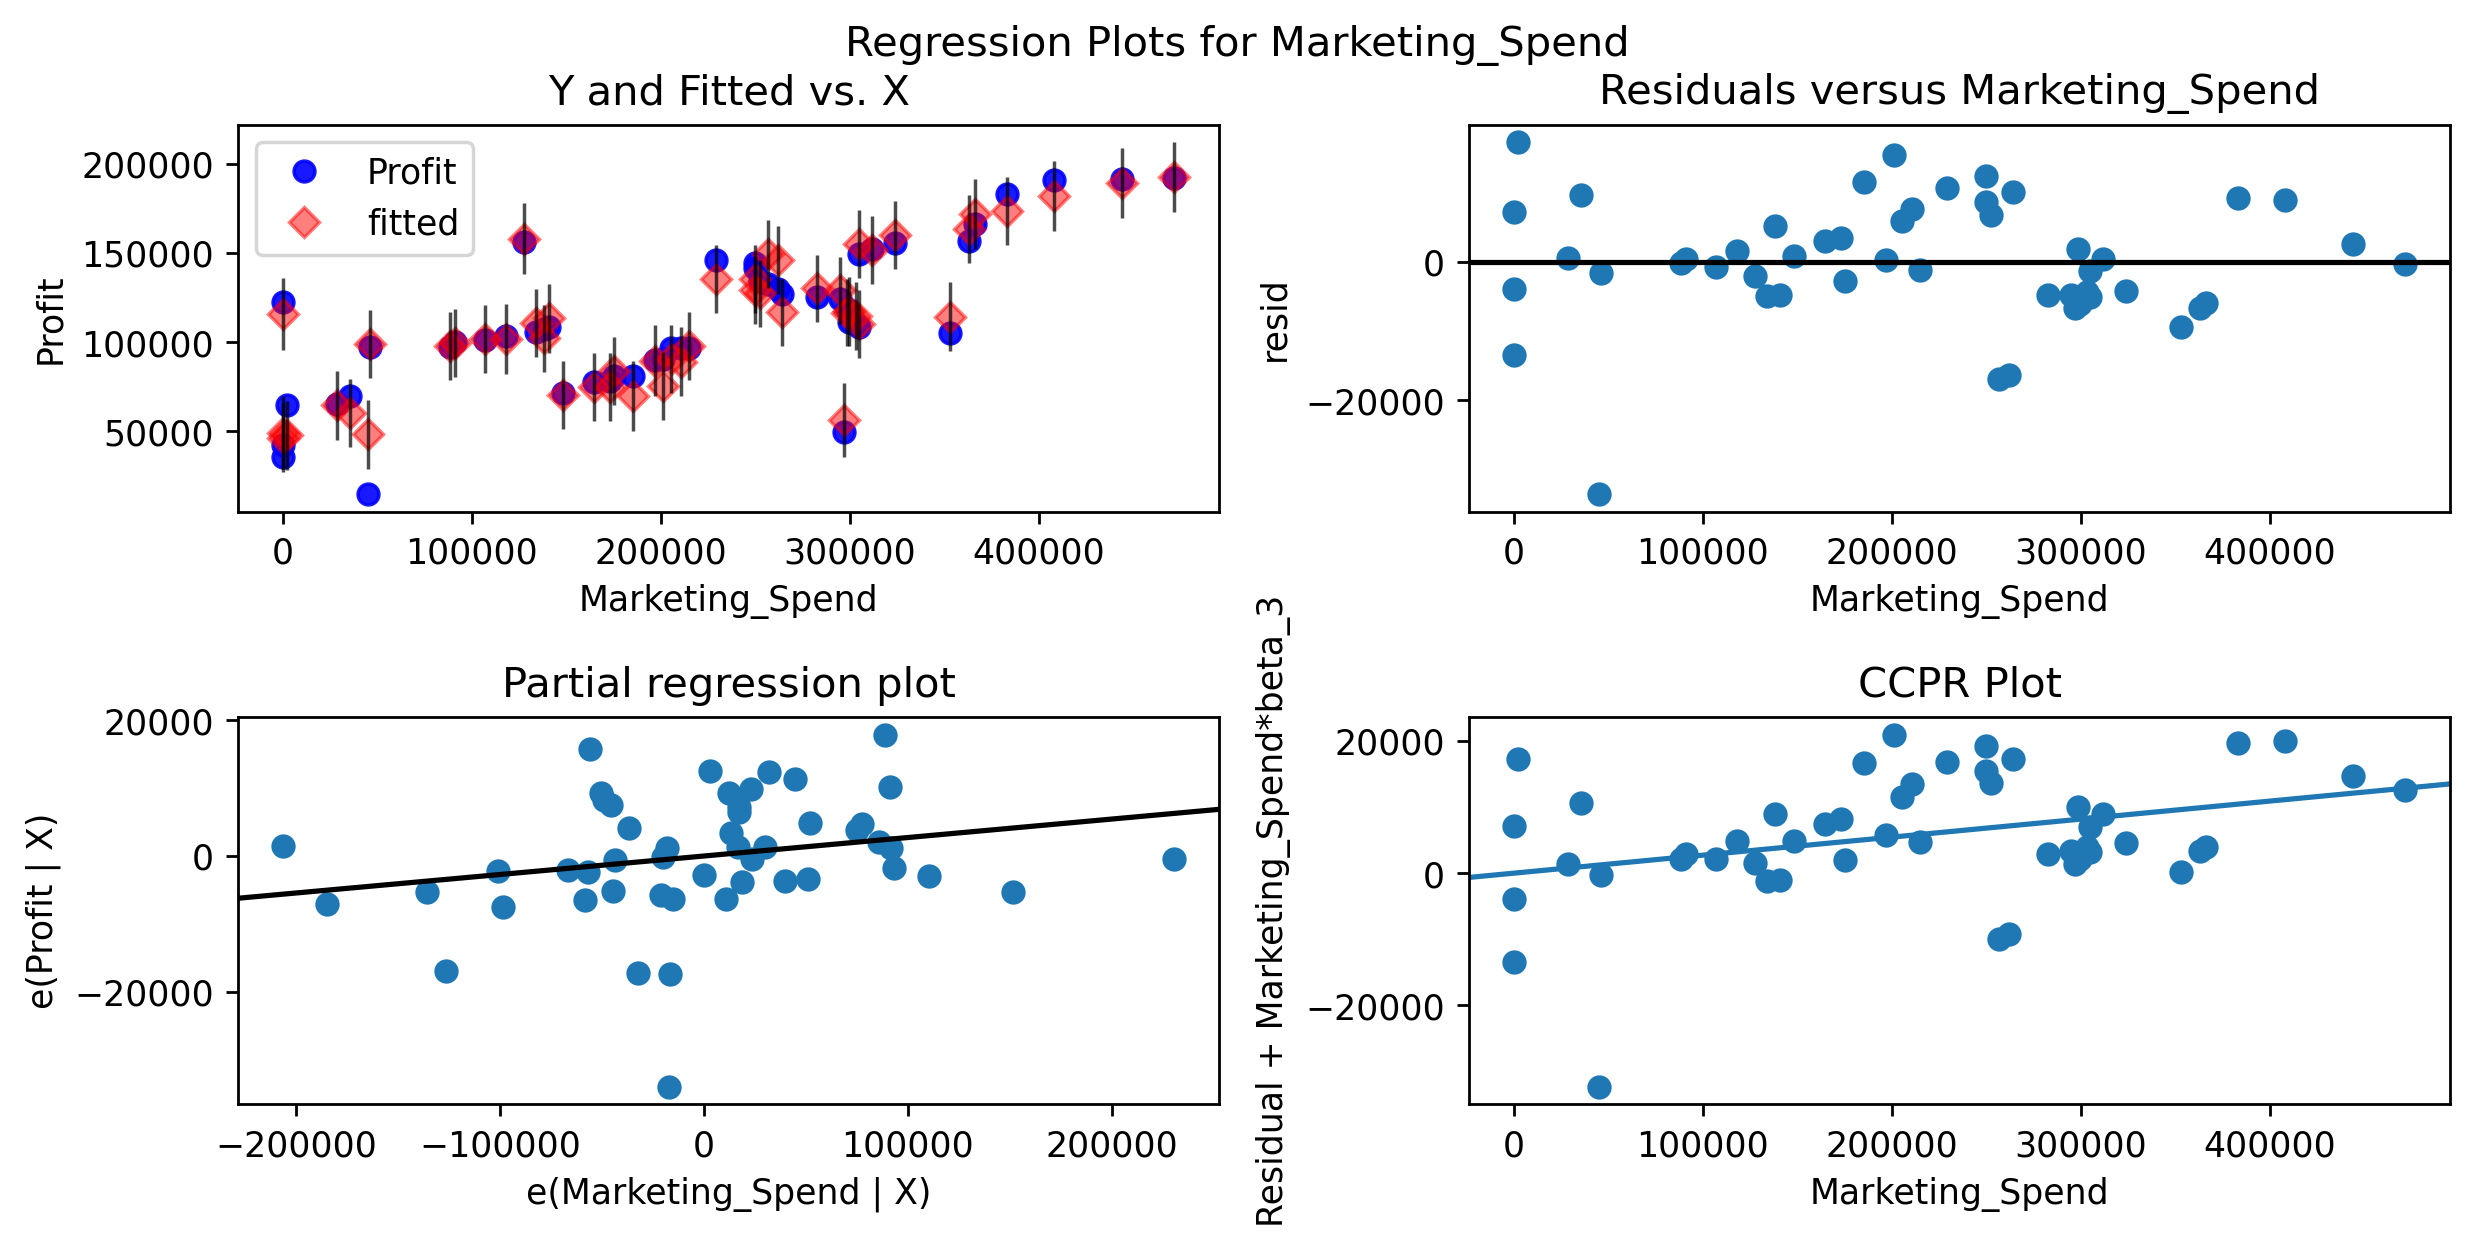

In [30]:
sm.graphics.plot_regress_exog(model, 'Marketing_Spend');

We plot influence plot using cooks distance to check outliers/influence points

In [31]:
model = smf.ols('Profit~Administration+RD_Spend+Marketing_Spend', data=df).fit()

In [32]:
influence = model.get_influence()
c,p = influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

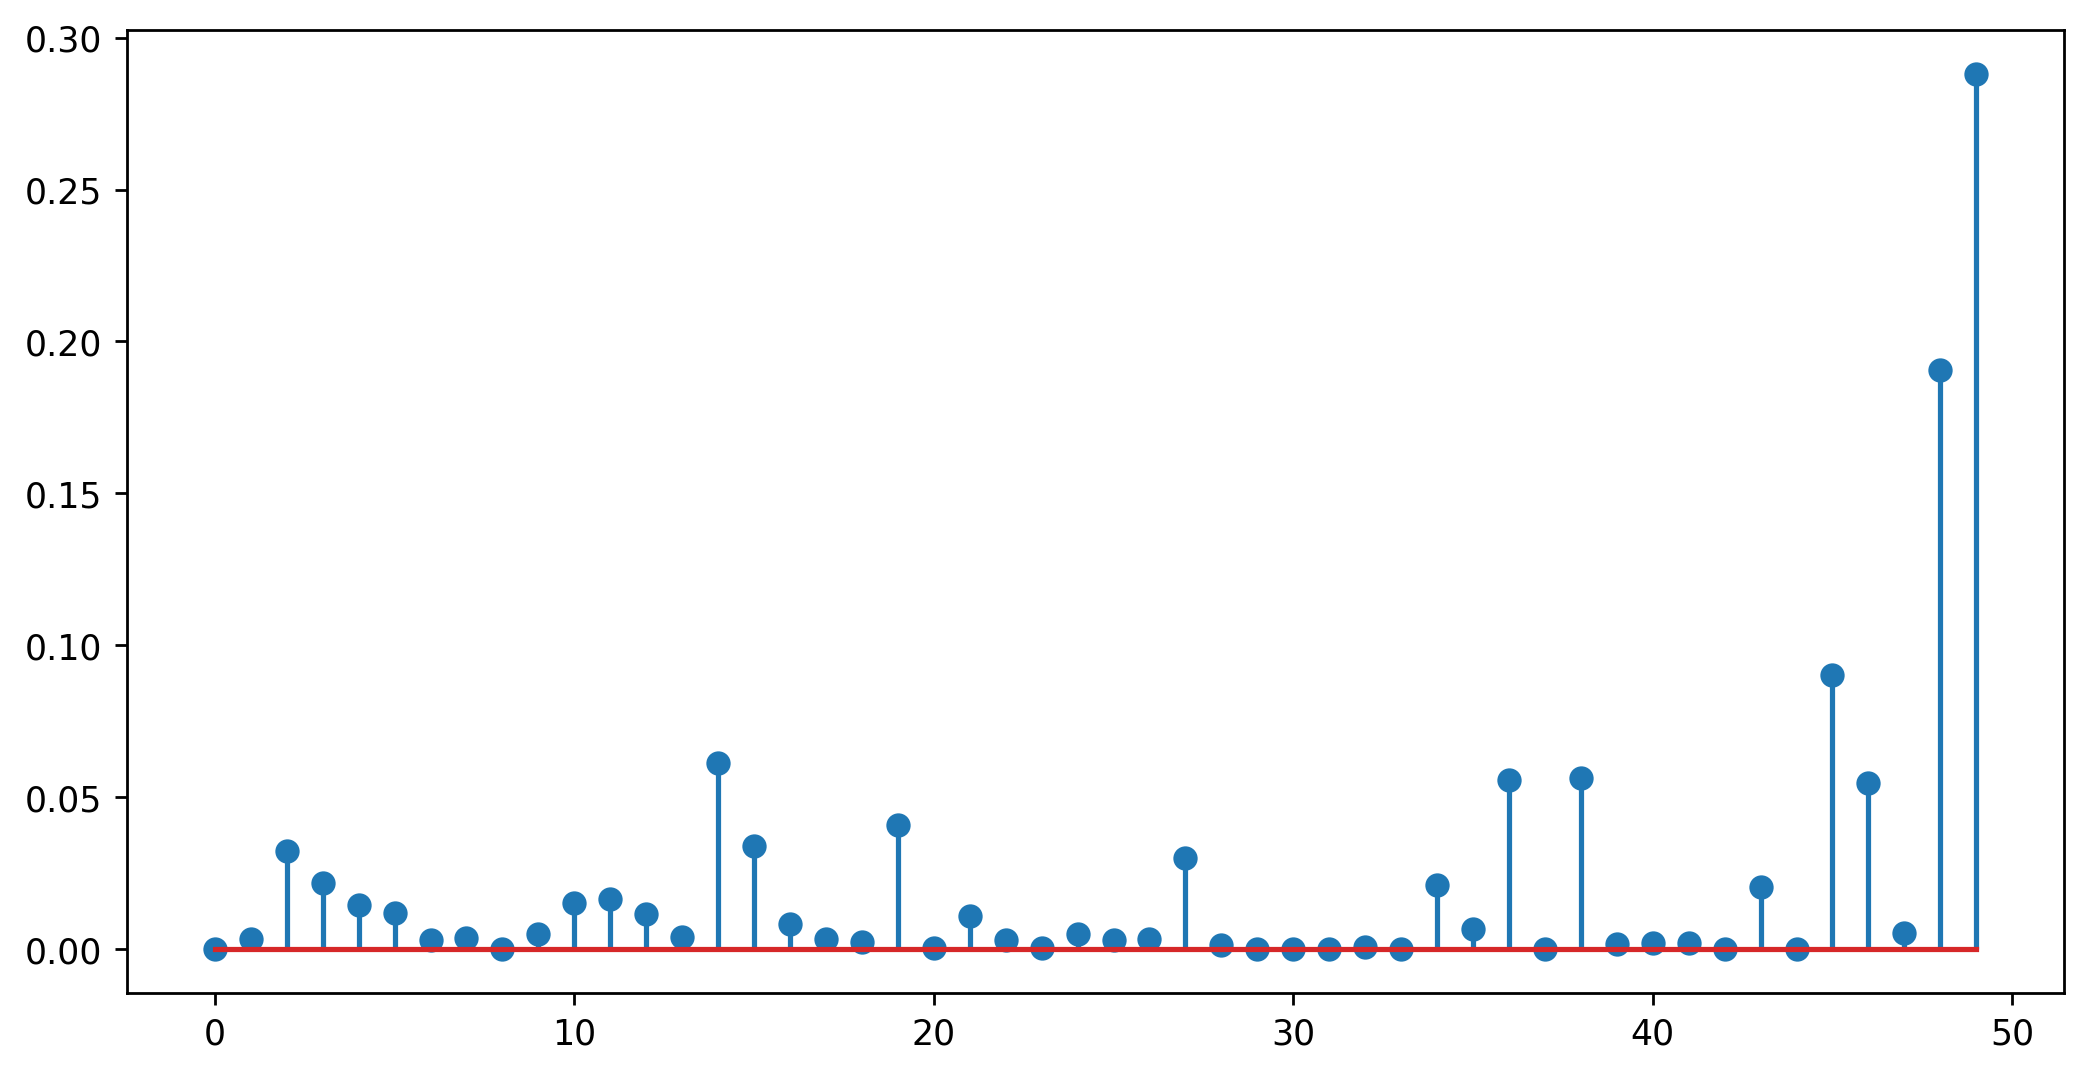

In [33]:
plt.stem(range(len(df)), c)

In [34]:
np.argmax(c), np.max(c)

(49, 0.2880822927543255)

In [35]:
#Calculating the cutoff value
#Calculate cutoff

k = len(df.columns)
n = len(df)

cut_off = 3*(k+1)/n
cut_off

0.3

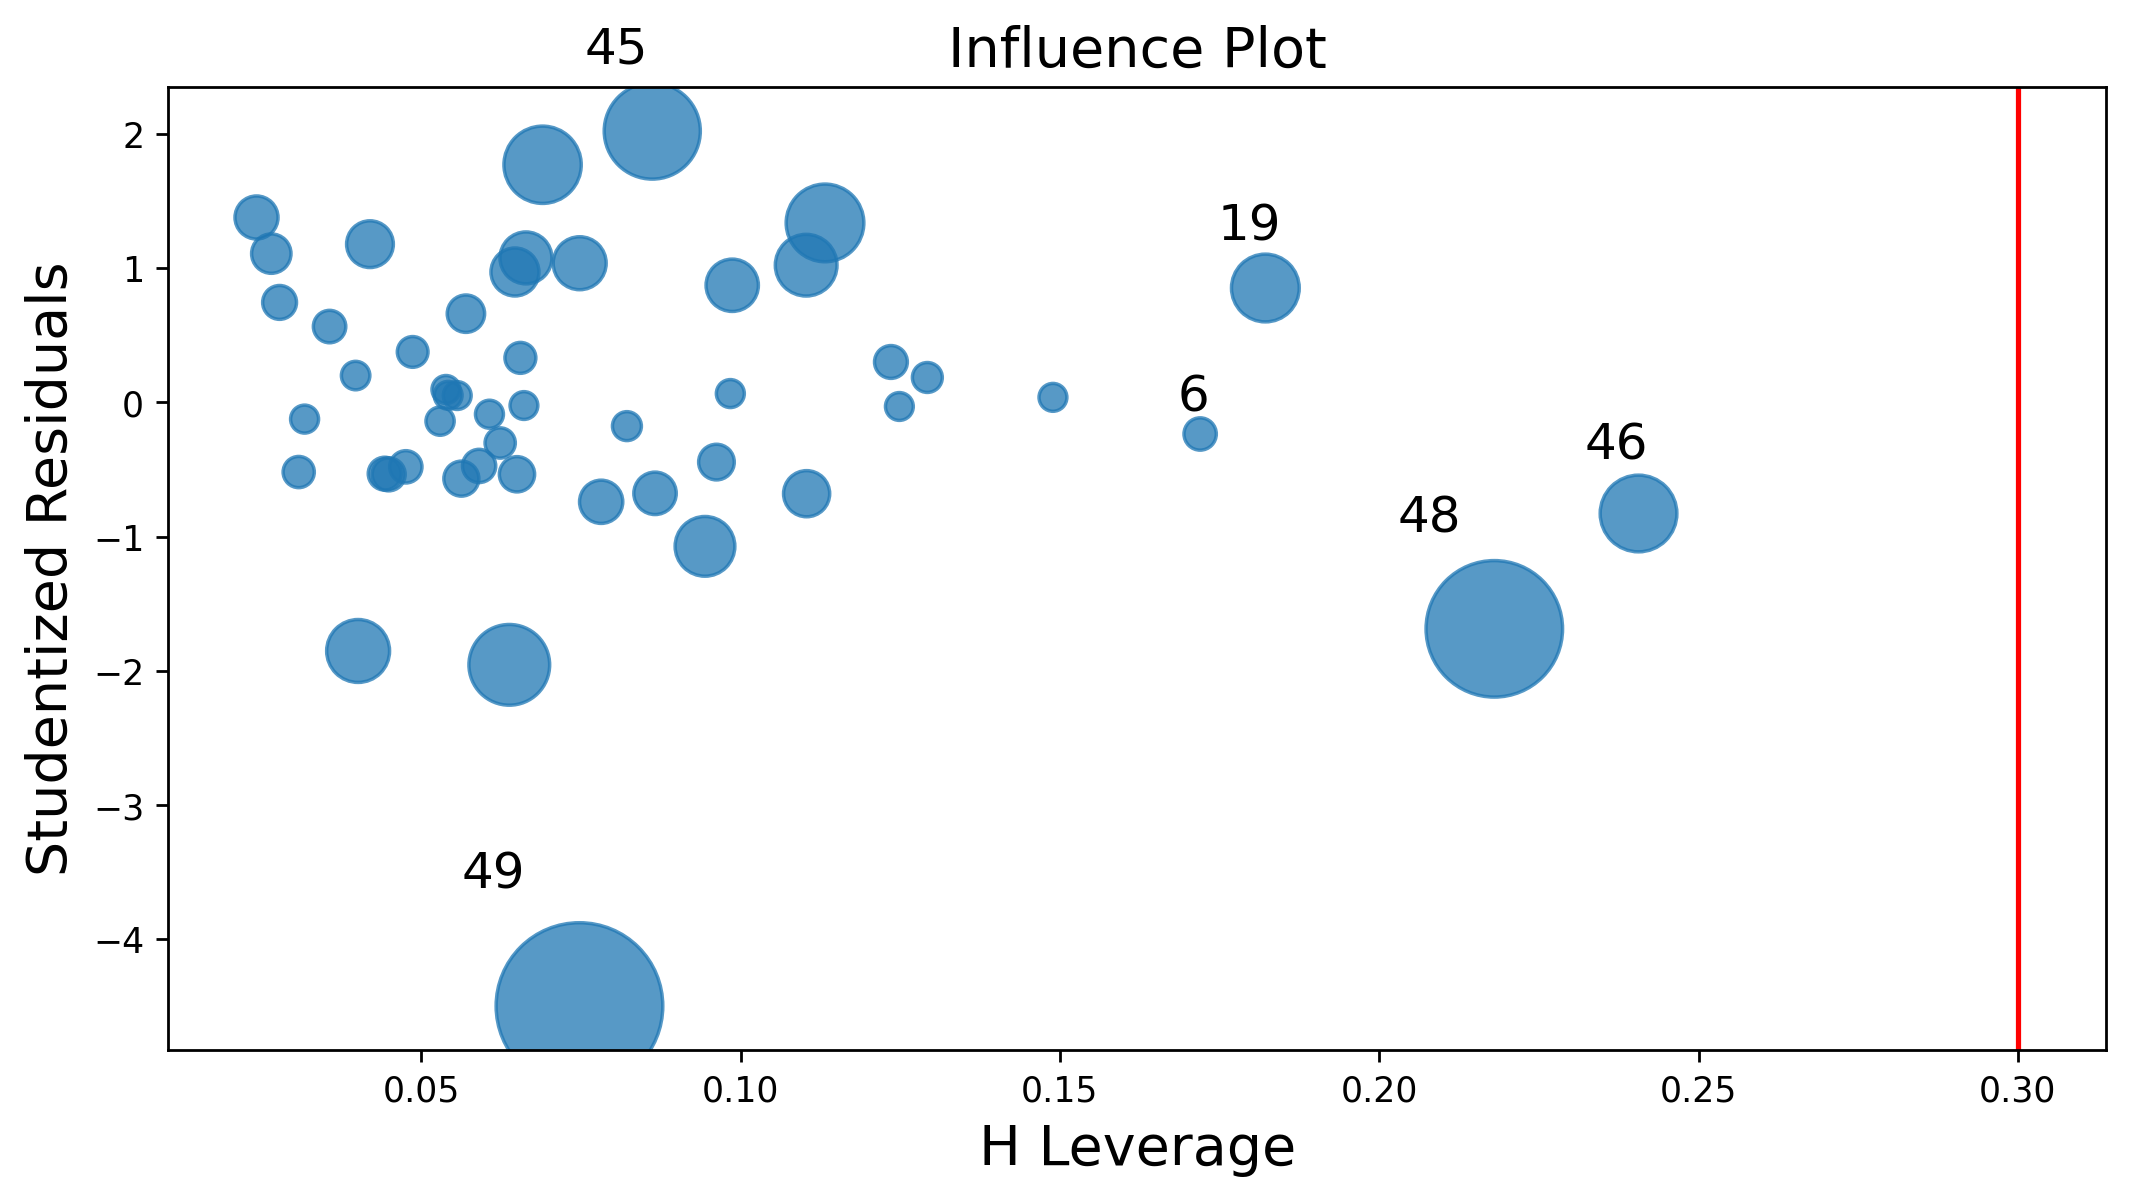

In [36]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model);
plt.axvline(cut_off, color='r')

No points are found to be influence points.

Administration column was a problem and showing collinearity with other independent column. So we will directly try dropping that column and check if it gives any major difference to our rsquared value.

In [37]:
model_with = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend', data=df).fit()

In [38]:
model_with.rsquared

0.9507459940683246

In [39]:
model_without = smf.ols('Profit~RD_Spend+Marketing_Spend', data=df).fit()

In [40]:
model_without.rsquared

0.9504503015559763

In [41]:
final_model = model_without

In [42]:
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [43]:
newdf = pd.DataFrame({
    'Administration' : [14239,11324,9837,9732,21001],
    'RD_Spend' : [165351,148673,186482,156492,186749],
    'Marketing_Spend' : [471790,466184,563274,381649,501972],
})

In [44]:
newdf

,Administration,RD_Spend,Marketing_Spend
0,14239,165351,471790
1,11324,148673,466184
2,9837,186482,563274
3,9732,156492,381649
4,21001,186749,501972


In [45]:
final_model.predict(newdf)

0    192802.068933
1    179348.976698
2    212370.778423
3    183049.205108
4    210750.053797
dtype: float64